# Import Package and csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"EasyVisa.csv")
# Print shape of dataset
print(df.shape)

(25480, 12)


## Data Cleaning

# Handling missing values
    Handle missing values
    Handle duplicate values
    check data type
    understand the dataset

Check null Values

In [2]:
# Features with NAN value
feature_with_na = [feature for feature in df.columns if(df[feature].isnull().sum()>=1)]

for feat in feature_with_na:
    print(feat,np.round(df[feat].isnull().sum()*100),"% missing values")

In [3]:
feature_with_na

[]

There is no feature with missing value

### Other Data Cleaning step

Handling duplicate value

In [4]:
df.duplicated().sum()

0

There is no duplicate in dataset

Removing case_id from dataset 

In [5]:
df.drop("case_id",inplace=True,axis=1)

## Feature engineering

Feature Extraction

In [6]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Here we have a column yr_of_estab, from this we can find the age of organization

In [7]:
from datetime import date

today = date.today().strftime("%Y")
Current_Yr = int(today)

Subtract current year with establish year

In [8]:
df["CompanyAge"] = Current_Yr- df["yr_of_estab"]

In [9]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,CompanyAge
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


In [10]:
df.drop("yr_of_estab",inplace=True,axis=1)

In [11]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,CompanyAge
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,19


Type of Features

numberical feature 

In [12]:
num_feature = [feature for feature in df.columns if df[feature].dtype != "O"]
print(f"Number of numerical feature:{len(num_feature)}")

Number of numerical feature:3


Categorical feature

In [13]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == "O"]
print(f"Number of Categorical feature:{len(cat_feature)}")

Number of Categorical feature:8


Discrete feature

In [14]:
discreate_feat = [feat for feat in num_feature if len(df[feat].unique())<=25]
print(f"Number of Discrete feature:{len(discreate_feat)}")

Number of Discrete feature:0


Continous feature

In [15]:
continous_feature = [feat for feat in num_feature if df[feat] not in discreate_feat]
print(f"Number of Continous feature:{len(continous_feature)}")

Number of Continous feature:3


Split X and Y

X-  indepencent columns
y- dependent column (case_id)

In [16]:
X = df.drop("case_status",axis = 1)
y = df["case_status"]

In [17]:
X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,CompanyAge
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,19


In [18]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

In y we have 2 category  "Denied" and "Certified". We have to encode it to numerical value

In [19]:
y=np.where(y=="Denied",1,0)

1-> Denies

0-> Certified

In [20]:
y

array([1, 0, 1, ..., 0, 0, 0])

## Feature Transformation

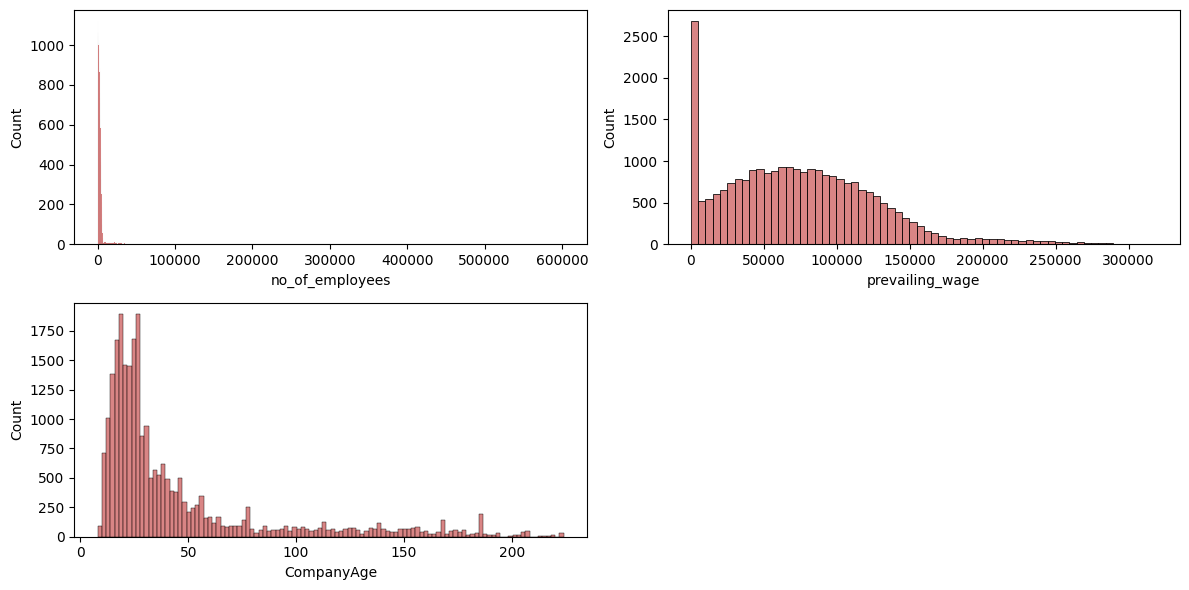

In [21]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','CompanyAge']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

    No of employees and Copmany age column is skewed

    Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

Checking Skewness

# What is Skewness ?

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [22]:
# checking skewness

X[continous_feature].skew(skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
CompanyAge          2.037301
dtype: float64

    Positiviely Skewed : company_age, no_of_employees.

    We can handle outliers and then check the skewness.

## Apply Power Transform to check if it can reduce the outlier

In [23]:
from sklearn.preprocessing import PowerTransformer

In [24]:
X.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'region_of_employment',
       'prevailing_wage', 'unit_of_wage', 'full_time_position', 'CompanyAge'],
      dtype='object')

In [25]:
pt = PowerTransformer(method="yeo-johnson")
transform_feature = ["CompanyAge","no_of_employees"]
X_copy = pt.fit_transform(X[transform_feature])

In [26]:
X_copy = pd.DataFrame(X_copy,columns=transform_feature)
X_copy

,CompanyAge,no_of_employees
0,-0.952162,1.517300
1,-0.462942,0.030912
2,-1.075820,2.885076
3,1.629178,-1.343550
4,-0.733953,-0.432287
...,...,...
25475,-1.075820,0.079917
25476,-0.838640,0.235747
25477,1.547445,-0.413885
25478,1.683834,-0.111949


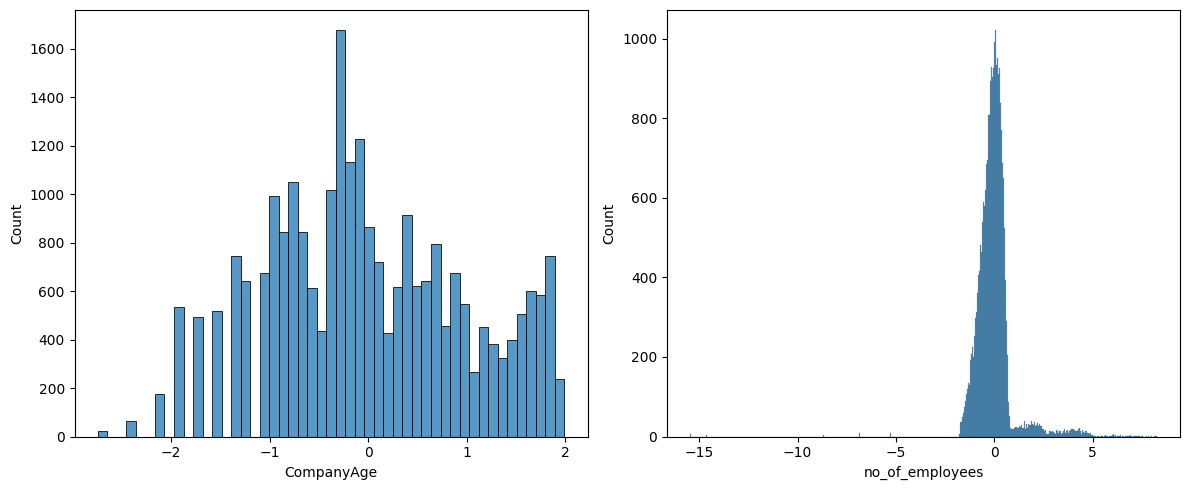

In [27]:
plt.figure(figsize=(12,5))

for i,col in enumerate(transform_feature):
    plt.subplot(1,2,i+1)
    sns.histplot(x=X_copy[col])
    plt.xlabel(col)
    plt.tight_layout()

Now CompanyAge,no_of_employees are now normally distributed

In [28]:
# checking skewness

X_copy.skew()

CompanyAge         0.103264
no_of_employees    0.399339
dtype: float64

    Here Yeo-Johnson is used and it supports both positive or negative data for transformation.

    So Power Transformer with yeo-johnson can be used.

In [29]:
for feature in cat_feature:
    print(feature,":",len(df[feature].unique()))

continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


## Feature Encoding and Scaling

### One Hot Encoding for Columns which had lesser unique values and not ordinal

    One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

### Ordinal Encoding for Columns which has many unique categories

    Ordinal encoding is used here as label encoder is supported for column transformer.

    Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

### Standard Scaler

    Standardize features by removing the mean and scaling to unit variance.

### Power Transformer

    Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

## Selecting number features for preprocessing



In [30]:
num_feature = list(X.select_dtypes(exclude="object").columns)

In [31]:
num_feature

['no_of_employees', 'prevailing_wage', 'CompanyAge']

Preprocessing using column Transform 

In [32]:
# Create Column Transformer with 3 types of transformers
or_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
oh_columns = ['continent','unit_of_wage','region_of_employment']
transform_columns= ['no_of_employees','CompanyAge']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_feature)
    ]
)

In [33]:
X = preprocessor.fit_transform(X)

In [34]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

## Classification

In [35]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

## Train Test Split

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13638, 24), (3410, 24))

In [38]:
# import all classification algorithm 

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [39]:
def evaluate_clf(true_val,predicted_value):
    acc = accuracy_score(true_val,predicted_value)  # calculate accuracy
    f1 = f1_score(true_val,predicted_value)
    precision = precision_score(true_val, predicted_value) # Calculate Precision
    recall = recall_score(true_val, predicted_value)  # Calculate Recall
    roc_auc = roc_auc_score(true_val, predicted_value) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc


In [40]:
models = {
    "Random Forest":RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [41]:
# Create a function which will evaluate the model and return a report
def evaluate_model(X,y,models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    model_list = []
    accuracy_list = []
    auc = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train,y_train)  # train the model

        # make predication
        y_train_predict = model.predict(X_train)
        y_test_predict = model.predict(X_test)

        # Training set performance
        model_train_accuracy,model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score = evaluate_clf(y_train,y_train_predict)

        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score = evaluate_clf(y_test,y_test_predict)

        model_trained = list(models.keys())[i]
        print("Model Trained:"+model_trained)
        model_list.append(model_trained)

        print("Model Performance for training set")
        print("-Accuracy:{:.4f}".format(model_train_accuracy))
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')

    report = pd.DataFrame(list(zip(model_list,accuracy_list)),columns=["Model Name","Accuracy"])
    return report

## Model Training

In [42]:
base_model_report = evaluate_model(X=X_res,y=y_res,models=models)

Model Trained:Random Forest
Model Performance for training set
-Accuracy:1.0000
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9551
- F1 score: 0.9587
- Precision: 0.9569
- Recall: 0.9605
- Roc Auc Score: 0.9546


Model Trained:Decision Tree
Model Performance for training set
-Accuracy:1.0000
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9249
- F1 score: 0.9310
- Precision: 0.9275
- Recall: 0.9346
- Roc Auc Score: 0.9240


Model Trained:Gradient Boosting
Model Performance for training set
-Accuracy:0.8822
- Accuracy: 0.8822
- F1 score: 0.8903
- Precision: 0.8945
- Recall: 0.8862
- Roc Auc Score: 0.8819
----------------------------------
Model performance for Test set
- Accuracy: 0.8956
- F1 score: 0.9031
- Precision: 0.9095
-

In [43]:
base_model_report.sort_values(by='Accuracy',ascending=False)

,Model Name,Accuracy
0,Random Forest,0.955132
4,K-Neighbors Classifier,0.940176
5,XGBClassifier,0.935191
6,CatBoosting Classifier,0.929619
1,Decision Tree,0.924927
2,Gradient Boosting,0.895601
7,Support Vector Classifier,0.870088
8,AdaBoost Classifier,0.868328
3,Logistic Regression,0.744868


Here we can see that Random Forest , K-Neighbors and XGBClassifier giving us good accuracy

Let take these 3 Model and apply hyper parameters and check the accuracy

In [44]:
#Initialize parameter for hyper parameter tuning

xgboost_param = {
    "max_depth":range(3,10,2),
    "min_child_weight": range(1,6,2)
}

rf_params = { 
    "max_depth":[10,12,15,20],
    "max_features":['sqrt','log2',None],
    "n_estimators":[10,50,100,200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}
 

In [45]:
# Model list for Hyper parameter tuning 
randomcv_models = [
    ('XGBoost',XGBClassifier(),xgboost_param),
    ("Random Forest",RandomForestClassifier(),rf_params),
    ("KNN",KNeighborsClassifier(),knn_params)
] 

#### Create a function for model training and report which can be used in hyperparameter tuning loop



In [46]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
model_param


{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'Random Forest': {'n_estimators': 100,
  'max_features': 'sqrt',
  'max_depth': 20},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}}

#### Retraining the Model with best Parameters


In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['Random Forest']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_model(X=X_res, y=y_res, models=best_models)

Model Trained:Random Forest Classifier
Model Performance for training set
-Accuracy:0.9967
- Accuracy: 0.9967
- F1 score: 0.9969
- Precision: 0.9949
- Recall: 0.9990
- Roc Auc Score: 0.9965
----------------------------------
Model performance for Test set
- Accuracy: 0.9510
- F1 score: 0.9550
- Precision: 0.9507
- Recall: 0.9594
- Roc Auc Score: 0.9503


Model Trained:KNeighborsClassifier
Model Performance for training set
-Accuracy:1.0000
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9733
- F1 score: 0.9757
- Precision: 0.9651
- Recall: 0.9865
- Roc Auc Score: 0.9721


Model Trained:XGBClassifier
Model Performance for training set
-Accuracy:0.9995
- Accuracy: 0.9995
- F1 score: 0.9995
- Precision: 0.9993
- Recall: 0.9997
- Roc Auc Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.9455
- F1 score: 0.9498
- Preci

In [ ]:
tuned_report

,Model Name,Accuracy
0,Random Forest Classifier,0.951026
1,KNeighborsClassifier,0.973314
2,XGBClassifier,0.945455


In [ ]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9733
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1561
           1       0.97      0.99      0.98      1849

    accuracy                           0.97      3410
   macro avg       0.97      0.97      0.97      3410
weighted avg       0.97      0.97      0.97      3410



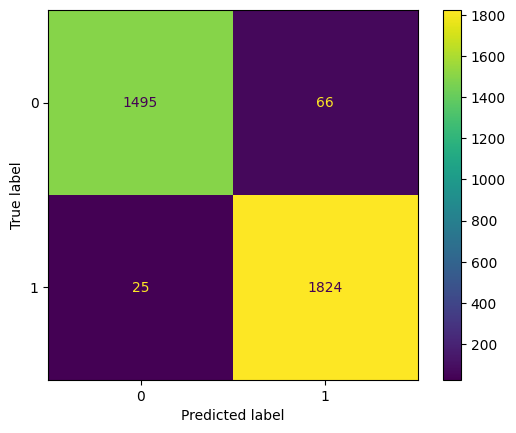

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

## Best Model is K-Nearest Neighbor(KNN) with Accuracy 97.33%